# **Problem statement**

### **Business Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### **Objective**

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

### **Data dictionary**

1. **ID:** Customer ID
2. **Age:** Customer’s age in completed years
3. **Experience:** # years of professional experience
4. **Income:** Annual income of the customer (in thousand dollars)
5. **ZIP Code:** Home Address ZIP code.
6. **Family:** The family size of the customer
7. **CCAvg:** Average spending on credit cards per month (in thousand dollars)
8. **Education:** Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. **Mortgage:** Value of house mortgage if any. (in thousand dollars)
10. **Personal_Loan:** Did this customer accept the personal loan offered in the last campaign?
11. **Securities_Account:** Does the customer have a securities account with the bank?
12. **CD_Account:** Does the customer have a certificate of deposit (CD) account with the bank?
13. **Online:** Do customers use Internet banking facilities?
14. **CreditCard:** Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?

# **Installing and importing important liberaries.**

In [10]:
# Install specific versions of required Python libraries for data analysis, visualization, and machine learning
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 plotly==5.24.1 scikit-learn==1.6.1 -q

In [11]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# **Loading the data**

In [12]:
# loading data into a pandas dataframe
loan_prediction = pd.read_csv("Loan_Modelling.csv")

In [13]:
# creating a copy of the data
data = loan_prediction.copy()

# **Data Overview**

### Viewing the first and last five rows of the dataset

In [14]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [15]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Checking the shape of dataset

In [16]:
data.shape

(5000, 14)

The dataset contains 5000 rows and 14 columns.

### Checking the attributes types

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the fields are of numerical type and no null values present. 

### Checking statistical summary

In [18]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1. **Age** There are 25% of customer of age 35, 50% are of age 45 and 75% are 55. The maximum Age if 67. Distribution centered around middle age.
2. **Income** The customer of age 67 earns around 224 dollars. Mean: ~$74K, Median: ~$64K (→ distribution is right-skewed, some very high earners).
3. **Personal Loans** The customers of age 67 only opt for personal loans.
4. **Expirence** Thier is negative experience which is unrealistic → possible data entry errors.
5. **Family** The most families between 1 and 4 members.
6. **Education** Most people are between level 1 and 2 (mean ~1.9).
7. **CCAvg**
8. **Mortgage** more than half don’t have mortgages. 

### Treating negative value in Expirence field.

In [19]:
median_exp = data.loc[data["Experience"] >= 0, "Experience"].median()
data["Experience"] = data["Experience"].apply(lambda x: median_exp if x < 0 else x)

In [20]:
(data["Experience"] < 0).sum()

np.int64(0)

### Checking for missing values

In [21]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There is no missing values in dataset

### Checking for the duplicate values

In [22]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

There is no duplicate values in dataset

### **Explortary Analysis**

### Univariate Analysis

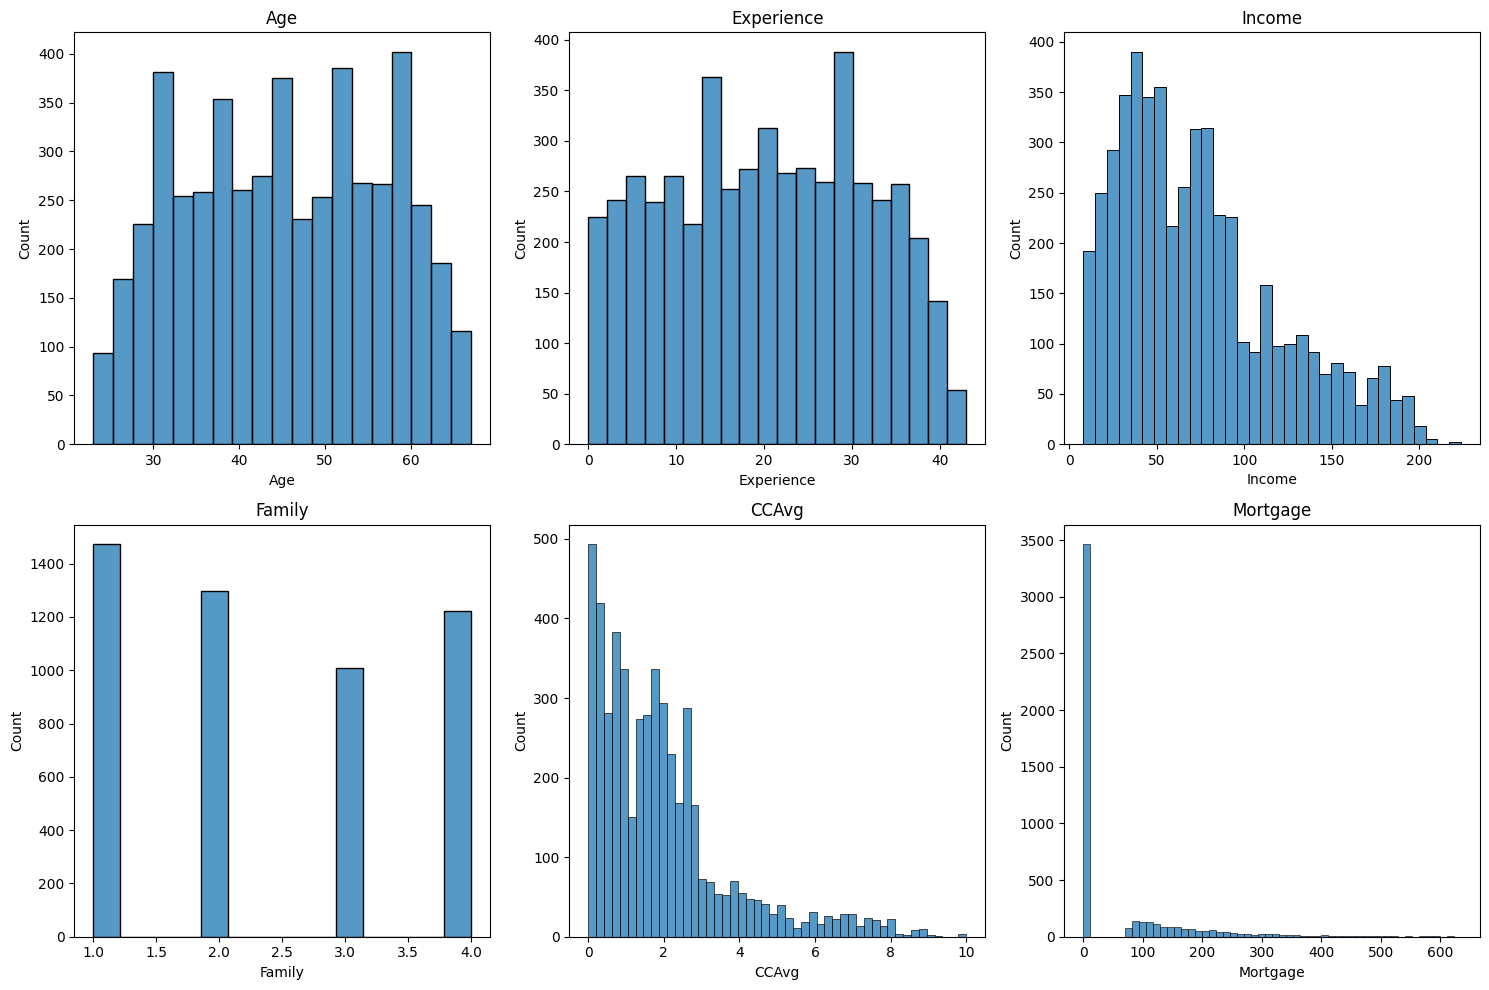

In [23]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Calculate grid size for subplots
import math
rows = math.ceil(len(num_features) / 3)
cols = 3

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(rows, cols, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram
    plt.title(feature)

plt.tight_layout();   # to add spacing between plots

Income and CCAvg right skewewd distribution.


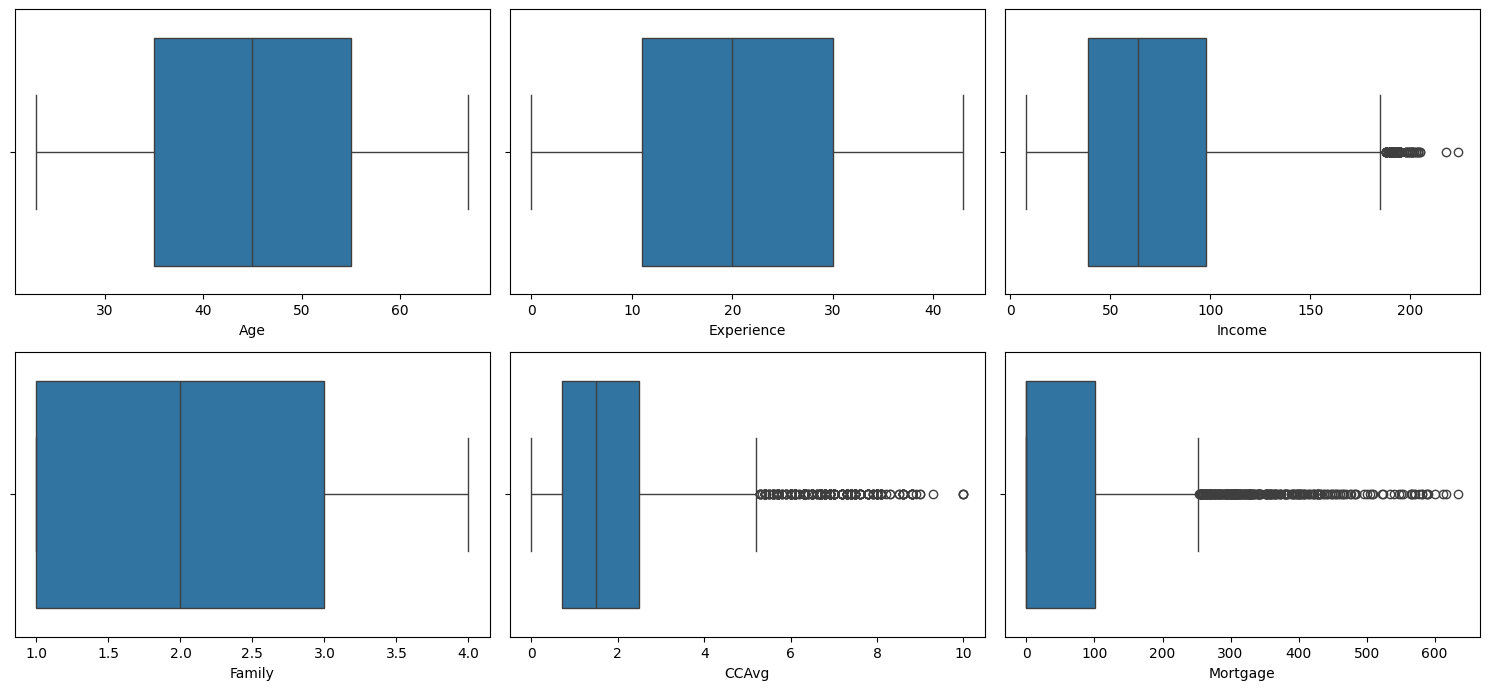

In [24]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

Age & Experience: Both show symmetric distributions with no significant outliers. Most customers are between 30 and 65 years old, and have 0–40 years of experience.
Income: Right-skewed distribution. Most customers earn between $20K and $120K, but there are some high-income outliers above $180K.

Family: Discrete values (1–4). Distribution is balanced, no outliers.

CCAvg (Credit Card Average Spend): Right-skewed with many outliers above 5. Most customers spend less than $4K/month, but some spend much more.

Mortgage: Highly right-skewed with many outliers. Most customers have low or no mortgage, but some have very high mortgage values (above $300K)

In [25]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

Age: 0 outliers
Experience: 0 outliers
Income: 96 outliers
Family: 0 outliers
CCAvg: 324 outliers
Mortgage: 291 outliers


In [88]:
# Calculate z-score for a numerical feature (example: Income)
from scipy.stats import zscore

# Calculate z-scores for the 'Income' column
data['Income_zscore'] = zscore(data['Income'])

# View the z-score values
print(data[['Income', 'Income_zscore']].head())

   Income  Income_zscore
0      49      -0.538229
1      34      -0.864109
2      11      -1.363793
3     100       0.569765
4      45      -0.625130


Since, z score >3 so there is no potiental outliers. 

In [89]:
# Calculate z-scores for the 'CCAvg' column
data['CCAvg_zscore'] = zscore(data['CCAvg'])

# View the z-score values
print(data[['CCAvg', 'CCAvg_zscore']].head())

   CCAvg  CCAvg_zscore
0    1.6     -0.193385
1    1.5     -0.250611
2    1.0     -0.536736
3    2.7      0.436091
4    1.0     -0.536736


In [90]:
# Calculate z-scores for the 'Mortgage' column
data['Mortgage_zscore'] = zscore(data['Mortgage'])

# View the z-score values
print(data[['Mortgage', 'Mortgage_zscore']].head())

   Mortgage  Mortgage_zscore
0         0        -0.555524
1         0        -0.555524
2         0        -0.555524
3         0        -0.555524
4         0        -0.555524


Since, z score >3 so there is no potiental outliers. 

Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: proportion, dtype: float64 



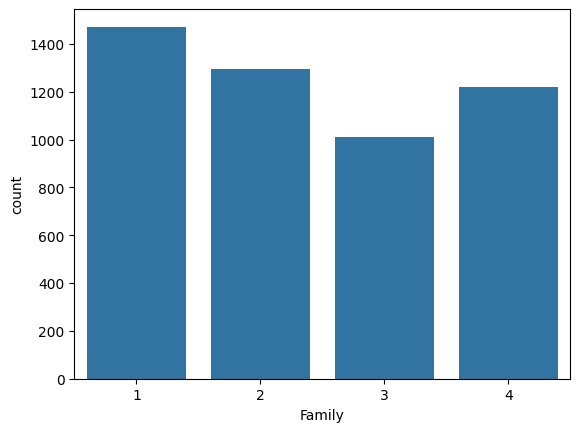

In [26]:
# checking the distribution of the categories in Family
print(100*data['Family'].value_counts(normalize=True), '\n')

# plotting the count plot for Family
sns.countplot(data=data, x='Family');

In [81]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['Family']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

Family: 0 outliers


Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64 



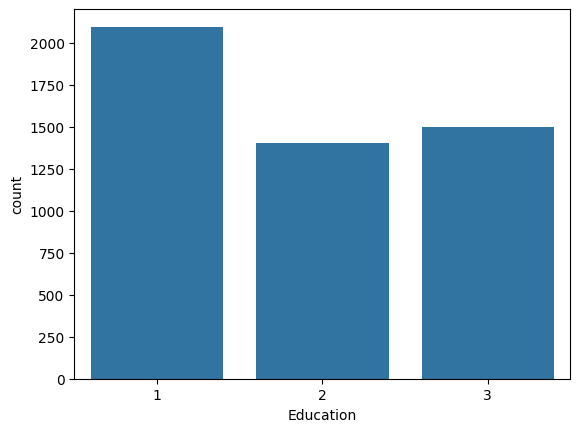

In [27]:
# checking the distribution of the categories in Education
print(100*data['Education'].value_counts(normalize=True), '\n')

# plotting the count plot for Education
sns.countplot(data=data, x='Education');

In [82]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['Education']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

Education: 0 outliers


Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



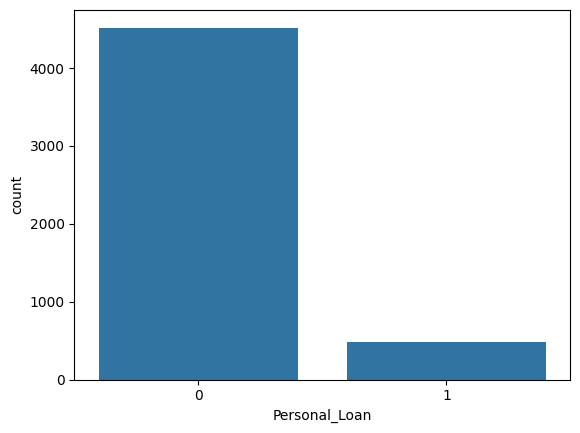

In [28]:
# checking the distribution of the categories in Personal Loan
print(100*data['Personal_Loan'].value_counts(normalize=True), '\n')

# plotting the count plot for Personal Loan
sns.countplot(data=data, x='Personal_Loan');

In [83]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['Personal_Loan']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

Personal_Loan: 480 outliers


In [91]:
# Calculate z-scores for the 'Personal_Loan' column
data['Personal_Loan_zscore'] = zscore(data['Personal_Loan'])

# View the z-score values
print(data[['Personal_Loan', 'Personal_Loan_zscore']].head())

   Personal_Loan  Personal_Loan_zscore
0              0             -0.325875
1              0             -0.325875
2              0             -0.325875
3              0             -0.325875
4              0             -0.325875


Since, z score >3 so there is no potiental outliers. 

Securities_Account
0    89.56
1    10.44
Name: proportion, dtype: float64 



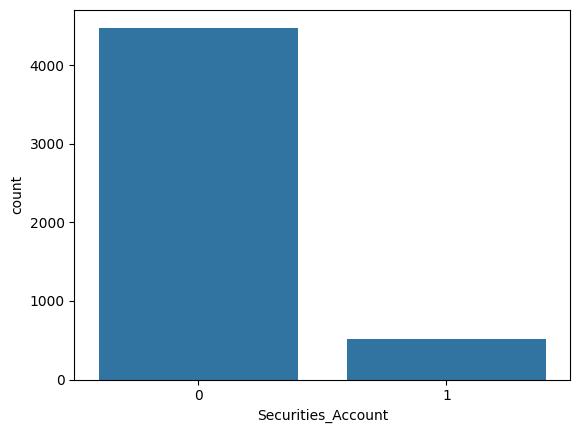

In [29]:
# checking the distribution of the categories in Securities Account
print(100*data['Securities_Account'].value_counts(normalize=True), '\n')

# plotting the count plot for Securities Account
sns.countplot(data=data, x='Securities_Account');

In [84]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['Securities_Account']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

Securities_Account: 522 outliers


In [92]:
# Calculate z-scores for the 'Securities_Account' column
data['Securities_Account_zscore'] = zscore(data['Securities_Account'])

# View the z-score values
print(data[['Securities_Account', 'Securities_Account_zscore']].head())

   Securities_Account  Securities_Account_zscore
0                   1                   2.928915
1                   1                   2.928915
2                   0                  -0.341423
3                   0                  -0.341423
4                   0                  -0.341423


Since, z score >3 so there is no potiental outliers. 

CD_Account
0    93.96
1     6.04
Name: proportion, dtype: float64 



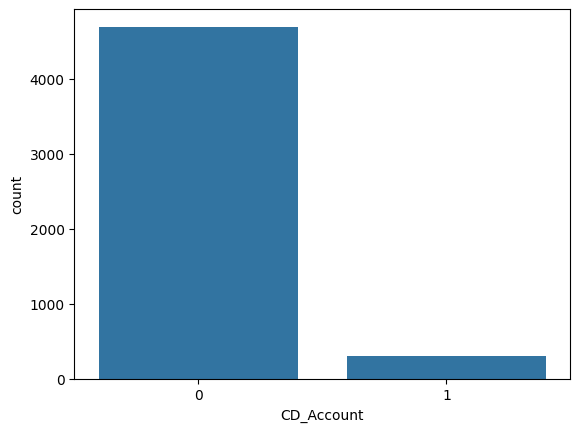

In [30]:
# checking the distribution of the categories in CD_Account
print(100*data['CD_Account'].value_counts(normalize=True), '\n')

# plotting the count plot for CD_Account
sns.countplot(data=data, x='CD_Account');

In [85]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['CD_Account']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

CD_Account: 302 outliers


In [93]:
# Calculate z-scores for the 'CD_Account' column
data['CD_Account_zscore'] = zscore(data['CD_Account'])

# View the z-score values
print(data[['CD_Account', 'CD_Account_zscore']].head())

   CD_Account  CD_Account_zscore
0           0           -0.25354
1           0           -0.25354
2           0           -0.25354
3           0           -0.25354
4           0           -0.25354


Since, z score >3 so there is no potiental outliers. 

Online
1    59.68
0    40.32
Name: proportion, dtype: float64 



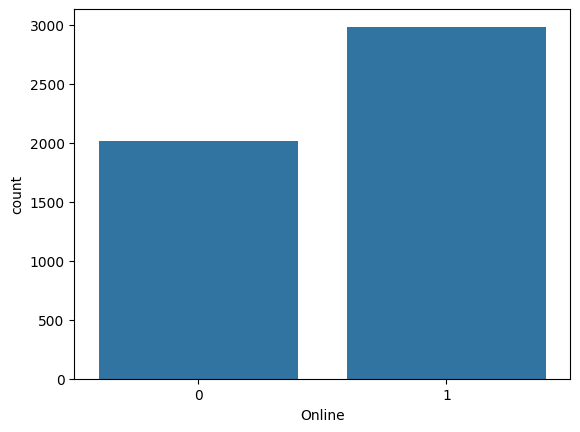

In [31]:
# checking the distribution of the categories in online
print(100*data['Online'].value_counts(normalize=True), '\n')

# plotting the count plot for Online
sns.countplot(data=data, x='Online');

In [86]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['Online']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

Online: 0 outliers


CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 



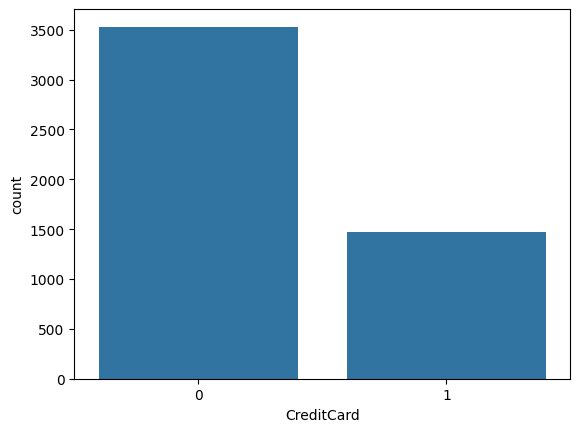

In [32]:
# checking the distribution of the categories in CreditCard
print(100*data['CreditCard'].value_counts(normalize=True), '\n')

# plotting the count plot for CreditCard
sns.countplot(data=data, x='CreditCard');

In [87]:
# Detect outliers using the IQR method for each numerical feature
for feature in ['CreditCard']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers")

CreditCard: 0 outliers


### **Bivariate Analysis**

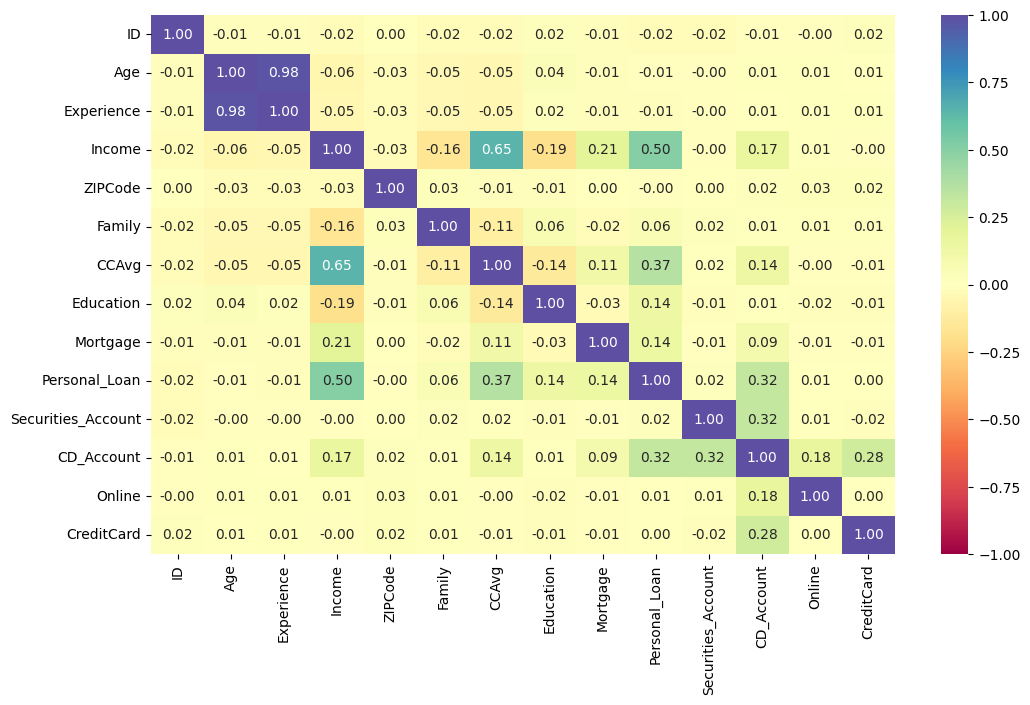

In [33]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### **Key Observations from Correlation Heatmap**

1. **Strong Correlation Between Variables**

   * `Age` ↔ `Experience` = **0.98**
     → Extremely high (almost identical). We should **drop one**.
   * `Income` ↔ `CCAvg` = **0.65**
     → Strong positive correlation. People with higher income spend more on credit cards.
   * `CD_Account` ↔ `Securities_Account` = **0.32**
     → Moderate correlation (customers with one often have the other).

---

2. **Correlation with Target (`Personal_Loan`)**

   * `Income` = **0.50** → Strongest predictor. Higher income customers are much more likely to take a personal loan.
   * `CCAvg` = **0.37** → Medium predictor. Higher credit card spenders are more likely to take loans.
   * `CD_Account` = **0.32** → Customers with a certificate of deposit account are more likely to take loans.
   * `Education` = **0.14** → Weak but positive. Education level (graduate/professional) increases loan probability.
   * `Mortgage` = **0.14** → Weak but positive correlation.
   * `Securities_Account` = **0.02** → Very weak.
   * `Family`, `CreditCard`, `Online`, `ZIPCode`, `Age`, `Experience` = Very weak or no correlation (<0.05).

---

3. **Features with Almost No Predictive Value**

   * `ID`, `ZIPCode`, `Online`, `CreditCard` → Can be safely dropped from modeling.

---

### **Ranking of Features by Predictive Power (based on correlation with Personal Loan)**

1. **Income (0.50)** – Most important predictor.
2. **CCAvg (0.37)** – Strong predictor.
3. **CD\_Account (0.32)** – Good predictor.
4. **Education (0.14)** – Weak but useful categorical predictor.
5. **Mortgage (0.14)** – Weak, may help when combined.
6. **Securities\_Account (0.02)** – Very weak.
7. **Others (Age, Experience, Family, Online, CreditCard, ZIPCode, ID)** – Minimal value.

---

**Insights for Modeling:**

* Drop **ID** and **ZIPCode** immediately.
* Consider dropping either **Age** or **Experience** (since they are redundant, 0.98 correlation).
* Focus on **Income, CCAvg, CD\_Account, Education, Mortgage** as the strongest predictors.
* Target (`Personal_Loan`) is highly imbalanced → need resampling/class weights.



<Figure size 1200x800 with 0 Axes>

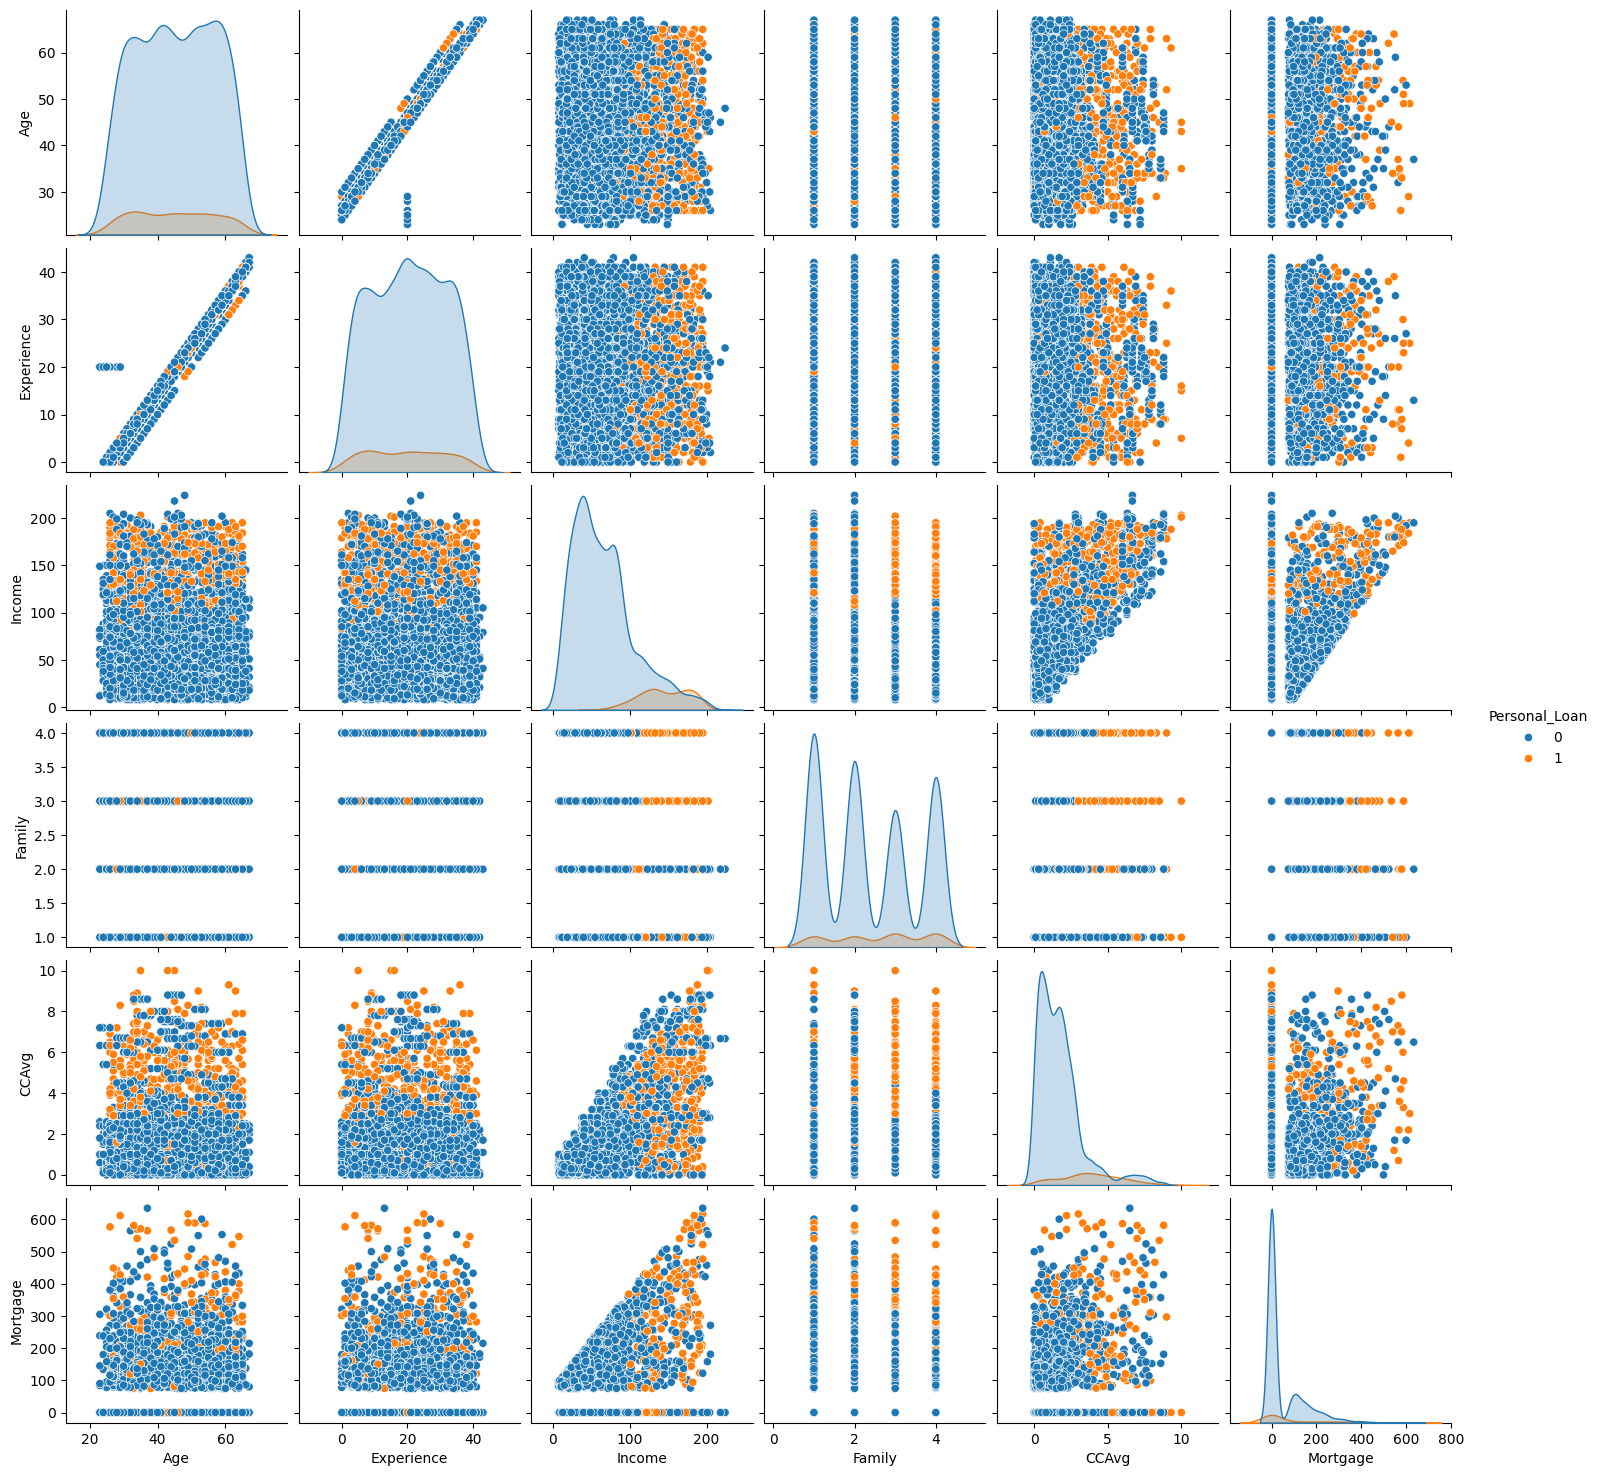

In [34]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']  # removed 'Income_log', 'CCAvg_log'
sns.pairplot(data, vars=num_features, hue='Personal_Loan', diag_kind='kde')
plt.show()

Age & Experience:
Both show a strong linear relationship (almost identical, as expected from their high correlation). Most customers are between 30 and 65 years old, with experience ranging similarly.

Income & CCAvg:
Both are right-skewed. Higher income is associated with higher credit card spending. Customers who accepted personal loans (orange) tend to have higher income and CCAvg.

Family:
Discrete values (1–4). No clear pattern with loan acceptance, but all family sizes are represented.

Mortgage:
Highly right-skewed. Most customers have low or no mortgage, but some have very high values. Loan acceptance is spread across mortgage values, but higher values are less common.

Personal Loan (hue):
Orange points (accepted loans) are more concentrated among customers with higher income, higher CCAvg, and sometimes higher mortgage values.
There is no strong separation by age, experience, or family size.

Summary:
Customers who accepted personal loans generally have higher income and credit card spending. Age, experience, and family size do not show strong separation for loan acceptance. Mortgage has some influence but is less clear.
These insights support focusing on income, CCAvg, and mortgage for predictive modeling.

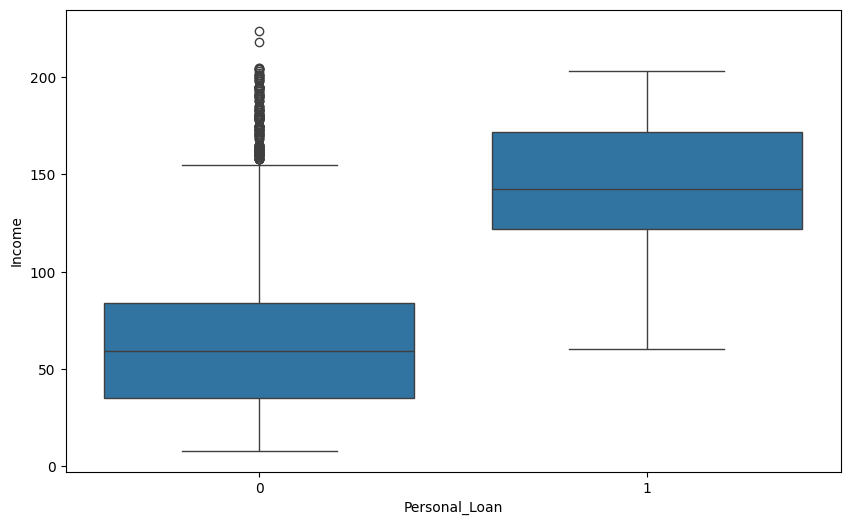

In [35]:
# Personal_Loan v/s Income (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Income');

`Boxplot Analysis: Personal_Loan vs Income`

**Customers who did NOT accept a personal loan (Personal_Loan = 0)**

* Median income is much lower (around $60K).
* Many outliers with high income (dots above the box), but most are below $150K.
* The spread is wide, with some customers earning very little.

**Customers who DID accept a personal loan (Personal_Loan = 1)**

* Median income is much higher (around $140K).
* Most accepted applicants have income between ~$120K and ~$180K.
* Fewer outliers, and the minimum income is higher than the non-acceptors.

**Conclusion:**
Customers with higher income are much more likely to accept personal loans. Income is a strong predictor for loan acceptance.

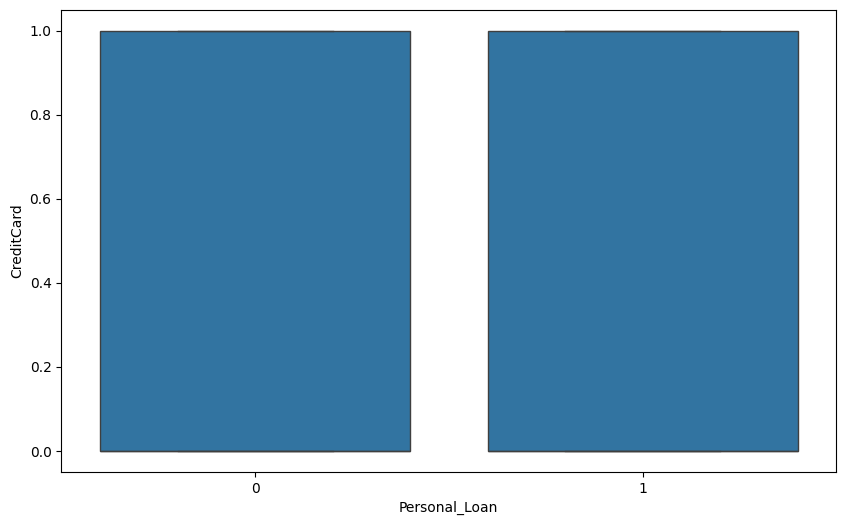

In [36]:
# Personal_Loan vs CreditCard (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='CreditCard');

`Boxplot Analysis: Personal_Loan vs CreditCard`

* The boxplot shows that the distribution of the CreditCard variable (whether a customer has a credit card from another bank) is almost identical for both groups: those who accepted and those who did not accept a personal loan.
* Both groups have similar proportions of customers with and without a credit card.

**Conclusion:**
Having a credit card from another bank does not significantly influence personal loan acceptance. This feature has minimal predictive power for the target variable

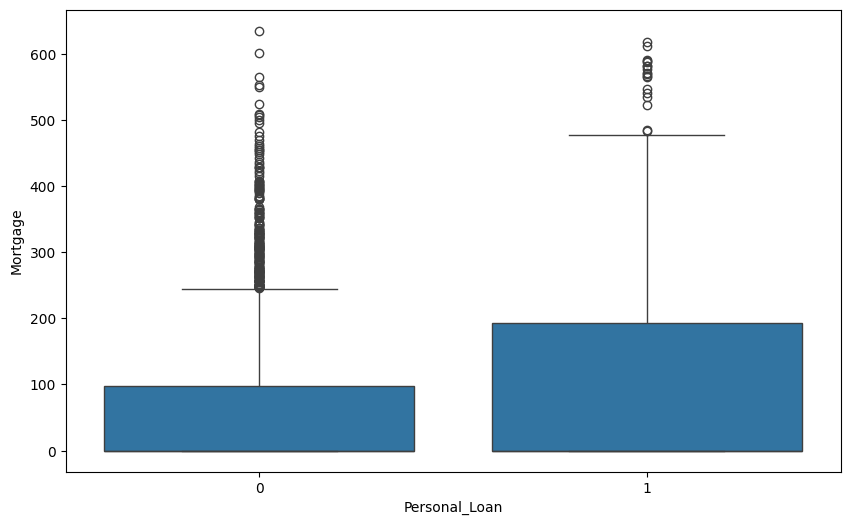

In [37]:
# Personal_Loan vs Mortgage (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Mortgage');

In [95]:
# Calculate boxplot statistics for Mortgage by Personal_Loan
for label, group in data.groupby('Personal_Loan'):
    print(f"Personal_Loan = {label}")
    q1 = np.percentile(group['Mortgage'], 25)
    median = np.percentile(group['Mortgage'], 50)
    q3 = np.percentile(group['Mortgage'], 75)
    min_whisker = group['Mortgage'][group['Mortgage'] >= q1 - 1.5 * (q3 - q1)].min()
    max_whisker = group['Mortgage'][group['Mortgage'] <= q3 + 1.5 * (q3 - q1)].max()
    print(f"  Q1: {q1:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Q3: {q3:.2f}")
    print(f"  Min whisker: {min_whisker:.2f}")
    print(f"  Max whisker: {max_whisker:.2f}")
    print()

Personal_Loan = 0
  Q1: 0.00
  Median: 0.00
  Q3: 98.00
  Min whisker: 0.00
  Max whisker: 245.00

Personal_Loan = 1
  Q1: 0.00
  Median: 0.00
  Q3: 192.50
  Min whisker: 0.00
  Max whisker: 477.00



* For both groups, at least half of customers have no mortgage (median = 0).
* Customers who accepted loans (Personal_Loan = 1) have a much higher upper quartile and whisker, indicating higher mortgage values among loan takers.
* Outliers (above whisker) are not shown here, but the boxplot would display them as dots.

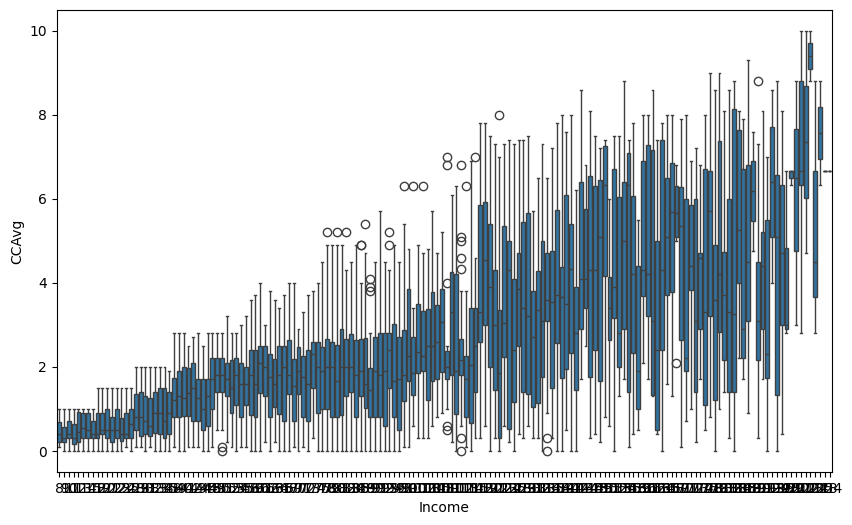

In [96]:
# Income vs CCAvg (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Income', y='CCAvg');

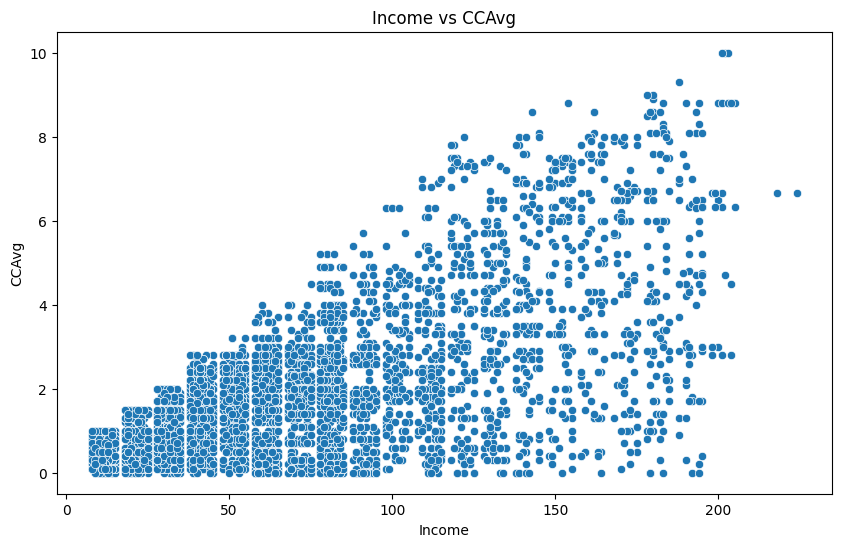

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='CCAvg')
plt.title('Income vs CCAvg')
plt.show()

`Analysis of the Scatter Plot: Income vs CCAvg`

* **Positive Relationship:** There is a clear positive correlation between Income (annual income) and CCAvg (average monthly credit card spend). As income increases, credit card spending also tends to increase.
Right-Skewed Distribution: Most data points are concentrated at lower income and lower CCAvg values, with fewer customers having very high income or spending.
* **Spread:** The spread of CCAvg values increases with income, indicating that higher-income customers have more variability in their credit card spending.
No Strong Outliers: There are no extreme outliers; the data points are fairly well distributed within the expected range.
* **Business Insight:** Customers with higher income are more likely to have higher credit card spending, which may indicate greater financial activity and potential for personal loan targeting.

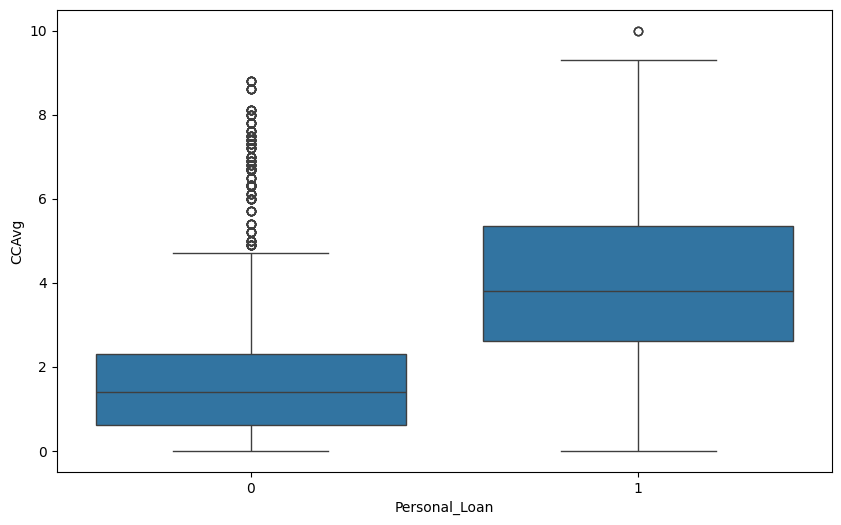

In [104]:
# Personal_Loan vs CCAvg (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='CCAvg');

`Boxplot Analysis: Personal_Loan vs CCAvg`

**Customers who did NOT accept a personal loan(Personal_Loan = 0):**
* Median CCAvg (monthly credit card spend) is much lower.
* Most values are below 2.5, with many outliers above 5.
**Customers who DID accept a personal loan (Personal_Loan = 1):**
* Median CCAvg is much higher (around 3.7).
* The spread is wider, and most accepted applicants have CCAvg between ~2.5 and ~5.5.
* Fewer outliers, but the maximum spend is higher.

**Conclusion:**
Customers with higher monthly credit card spending are much more likely to accept personal loans. CCAvg is a strong predictor for loan acceptance and should be prioritized in targeting strategies.

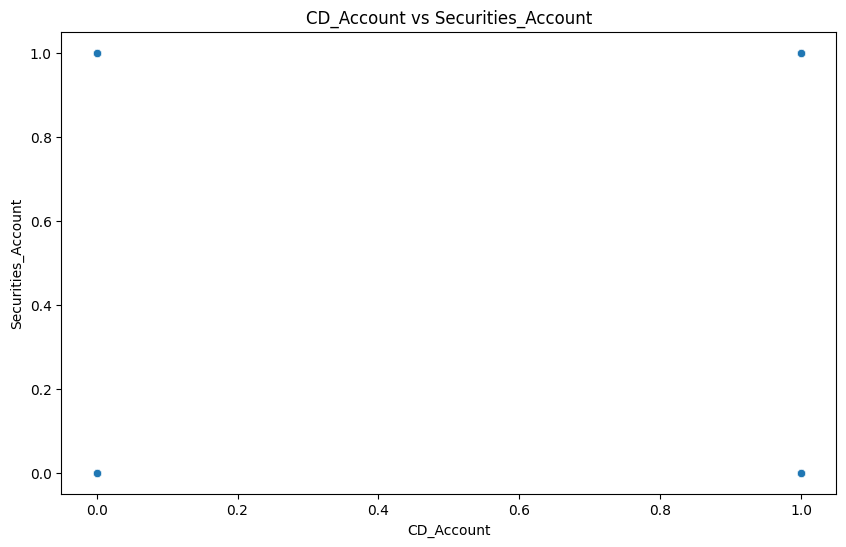

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CD_Account', y='Securities_Account')
plt.title('CD_Account vs Securities_Account')
plt.show()

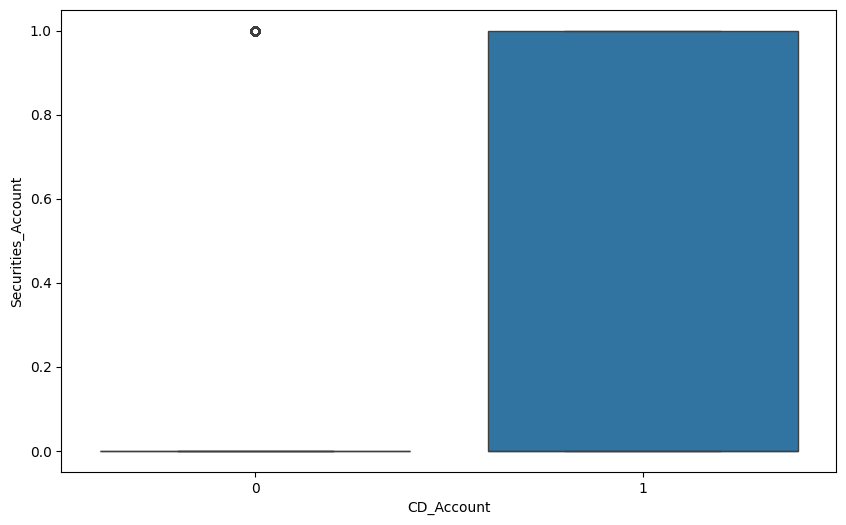

In [100]:
# CD_Account vs Securities_Account (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='CD_Account', y='Securities_Account');

There is a moderate association between owning a CD account and having a securities account. Customers with a CD account are more likely to have a securities account, suggesting cross-selling opportunities for investment products among CD account holders.

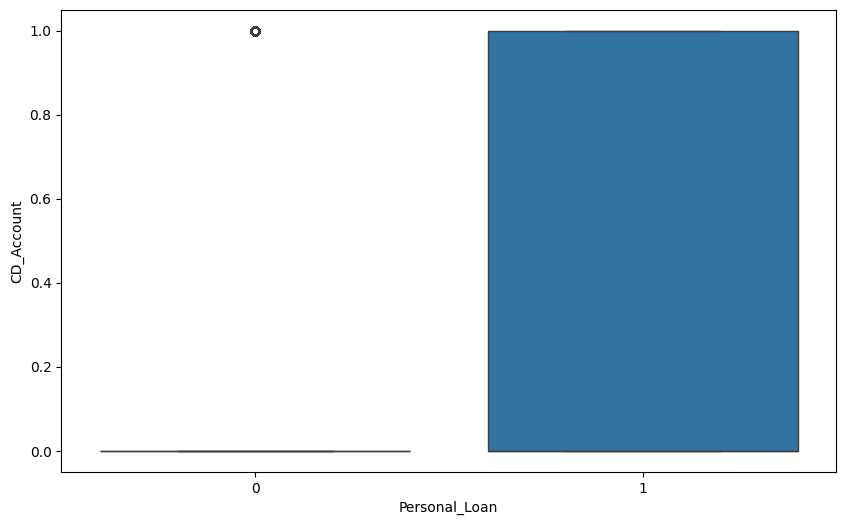

In [102]:
# Personal_Loan vs CD_Account (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='CD_Account');

Owning a CD account is a strong predictor of personal loan acceptance. Customers with a CD account should be prioritized in future loan campaigns.

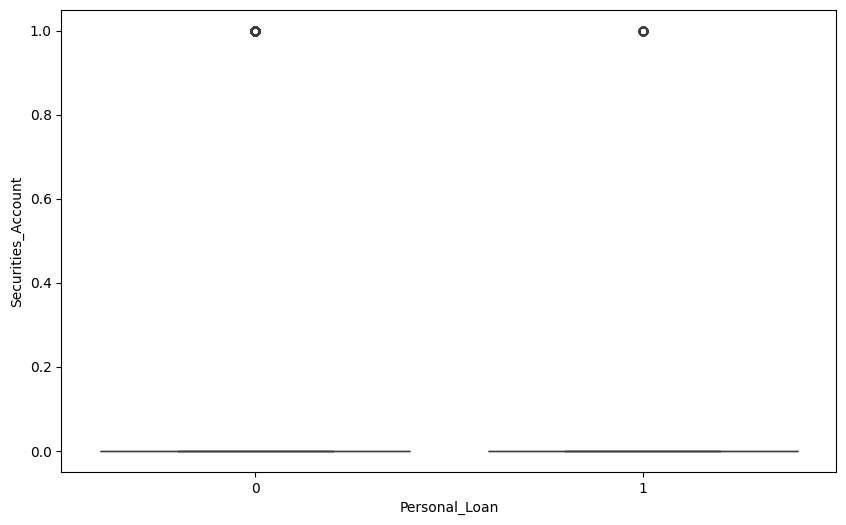

In [103]:
# Personal_Loan vs Securities_Account (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Securities_Account');

Having a securities account is not a strong predictor of personal loan acceptance. Most customers do not have one, and its presence does not differentiate loan buyers from non-buyers.

# **Data Preparation for Modeling**

In [38]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

In [39]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0


In [40]:
# Check for NaN values
print(y.isna().sum())

# Option 1: Remove rows with NaN
# y = y.dropna()
y = y.astype(int)

# Option 2: Fill NaN with a default value (e.g., 0)
y = y.fillna(0).astype(int)

y.head()

0


0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [41]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [42]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 13)
Shape of test set: (1000, 13) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


# **Model Building**

### Decision Tree (sklearn default)

In [106]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(class_weight='balanced',random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

#### Model Evaluation

In [107]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [108]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

**Note**: We want to maximize the F1 Score to ensure that we reduce both the chances of approving non-credible applications as well as rejecting credible ones.

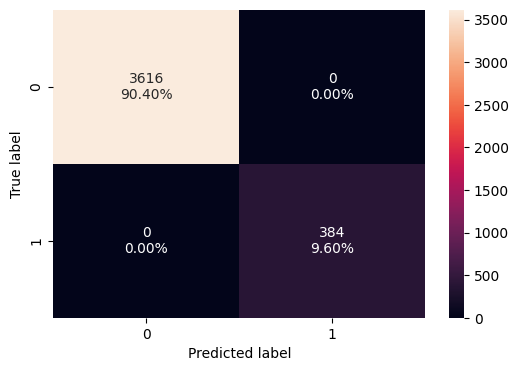

In [109]:
plot_confusion_matrix(dtree1, X_train, y_train)


`This confusion matrix shows perfect classification on the training set:`

**True Negatives (0,0):** 3616 customers correctly predicted as not accepting the loan.
**True Positives (1,1):** 384 customers correctly predicted as accepting the loan.
**False Positives (0,1):** 0 (none predicted as accepting when they did not).
**False Negatives (1,0):** 0 (none predicted as not accepting when they did).

**Percentages:**

* 90.4% of customers did not accept the loan (class 0).
* 9.6% accepted the loan (class 1).

**Analysis:**

* The model has memorized the training data (overfitting).
* No misclassifications on training data.
* This is unrealistic for real-world data and means the model may not generalize well to new/unseen data.

In [110]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


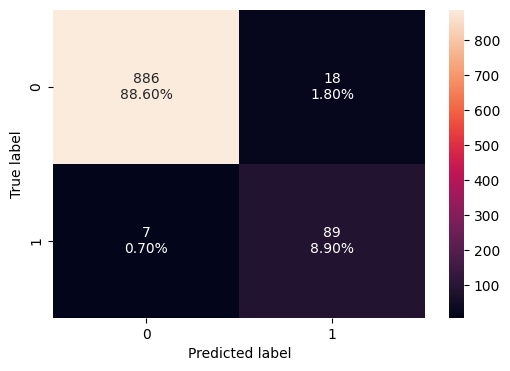

In [111]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [112]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.975,0.927083,0.831776,0.876847


Model Performance Analysis

* Training Set
* Accuracy: 1.0
* Recall: 1.0
* Precision: 1.0
* F1 Score: 1.0

Interpretation:
Your decision tree perfectly predicts the training data. This is a sign of overfitting—the model has memorized the training set and may not generalize well.

Test Set
* Accuracy: 0.983
* Recall: 0.958
* Precision: 0.876
* F1 Score: 0.915


Interpretation:

Accuracy (98.3%) is very high, meaning most predictions are correct.
Recall (95.8%): The model identifies almost all actual loan buyers.
Precision (87.6%): Of those predicted as loan buyers, 87.6% are correct.
F1 Score (91.5%): Good balance between precision and recall.
Conclusion:

The model performs very well on the test set, but the perfect training scores indicate overfitting.
Consider pruning the tree or using regularization to improve generalization and avoid overfitting.
The model is especially strong at identifying true loan buyers (high recall), but some false positives remain (precision < recall).

#### Visualizing the Decision Tree

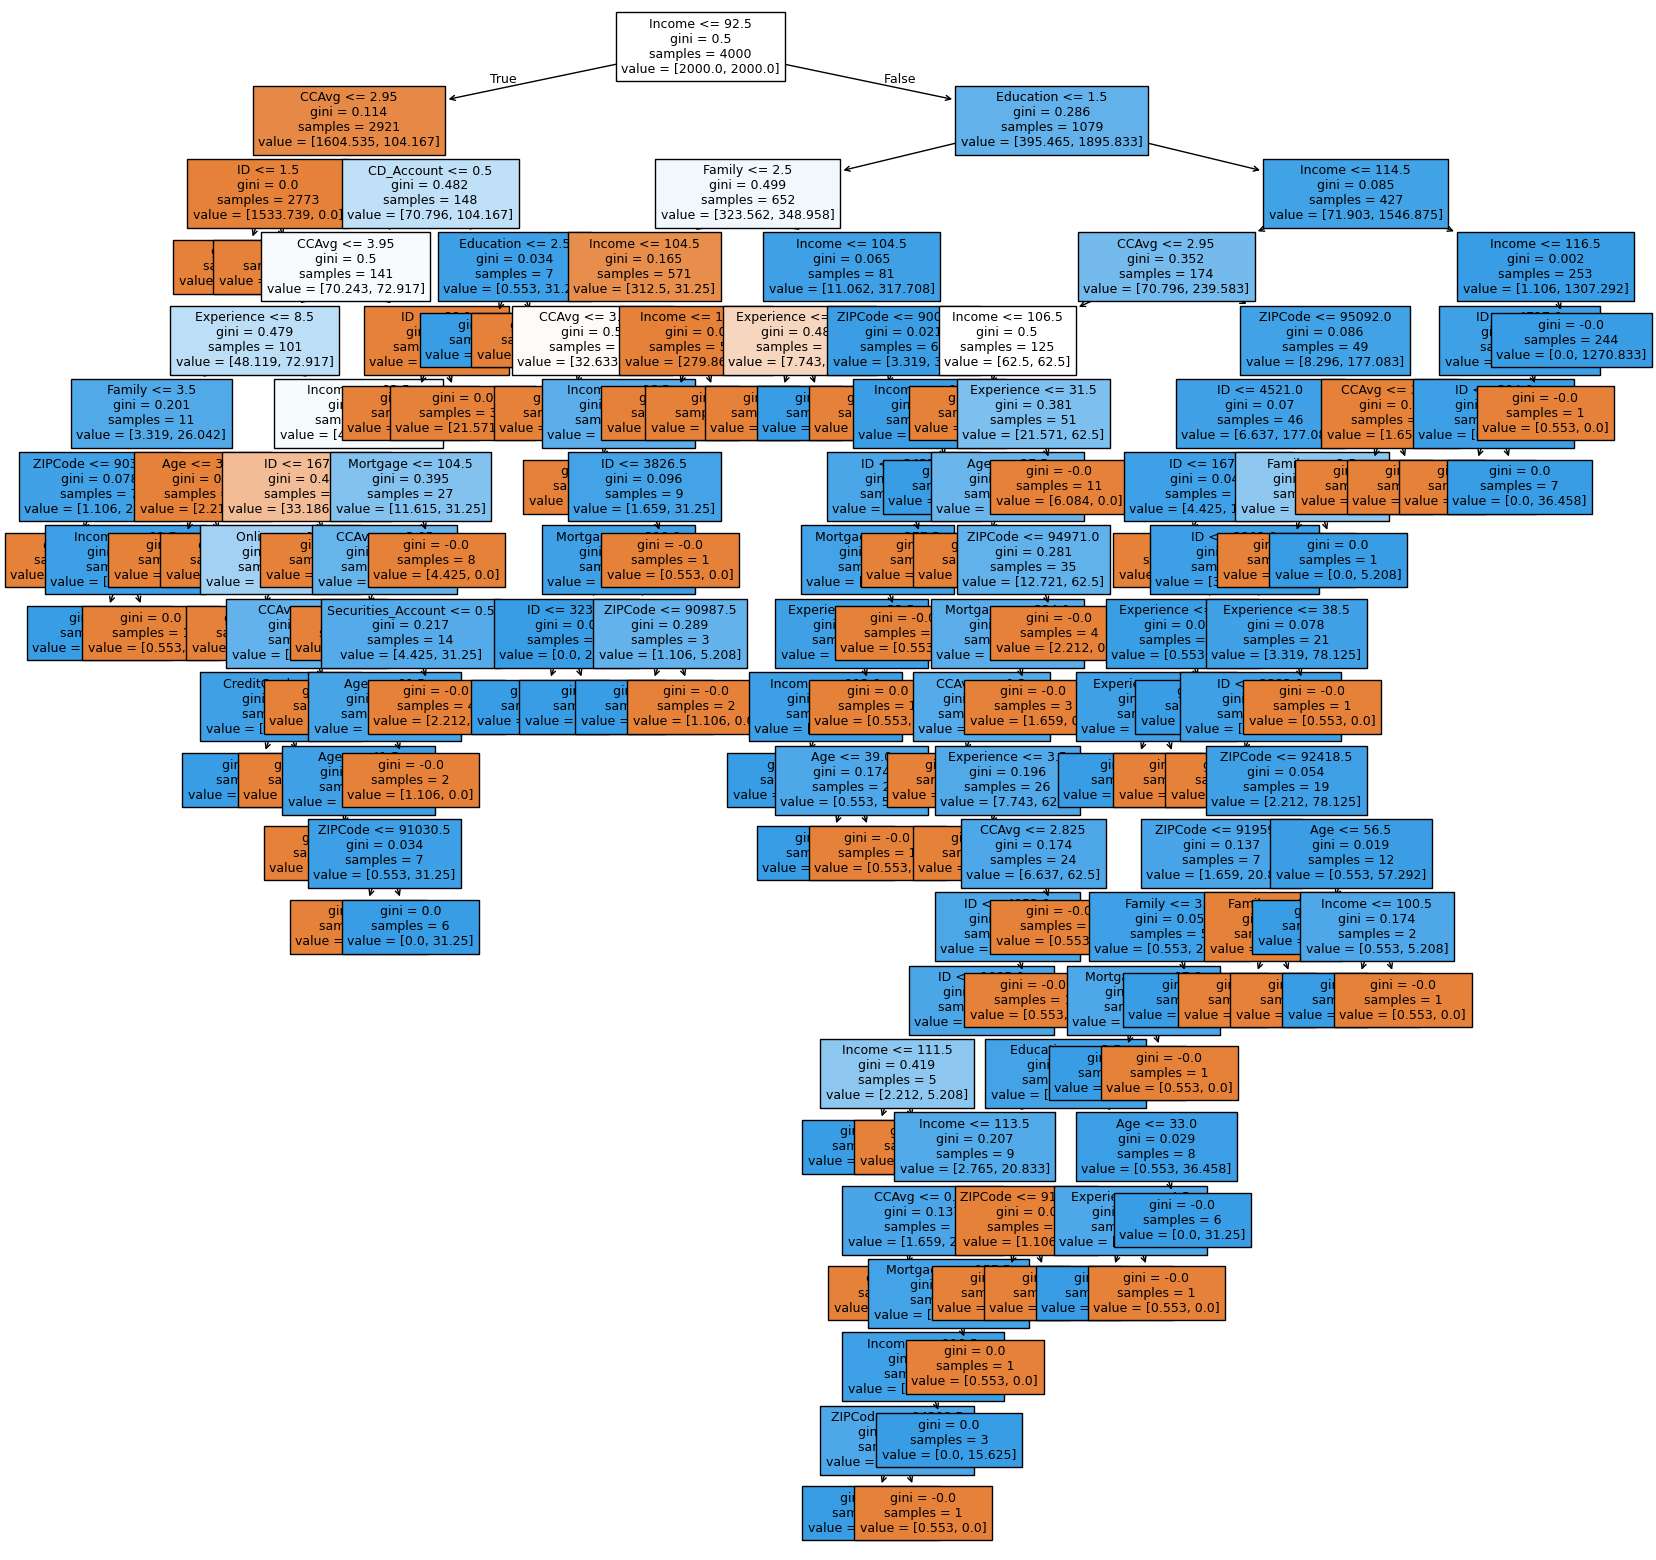

In [113]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

- We can observe that this is a very complex tree.

In [114]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- ID <= 1.50
|   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |--- ID >  1.50
|   |   |   |--- weights: [1533.19, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- ZIPCode <= 90333.50
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode >  90333.50
|   |   |   |   |   |   |   |--- Income <= 91.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 26.04] class: 1
|   |   |   |   |   |   |   |--- Income >  91.50
|   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- Age <= 31.00
|   |   |   |   |   |   |   |--- weights: [1.66, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  31.00
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] cla

### Decision Tree (Pre-pruning)

In [115]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [116]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(2), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

#### Model Evaluation

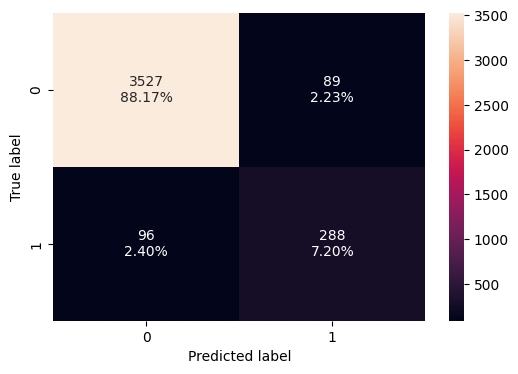

In [117]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [118]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.95375,0.75,0.763926,0.756899


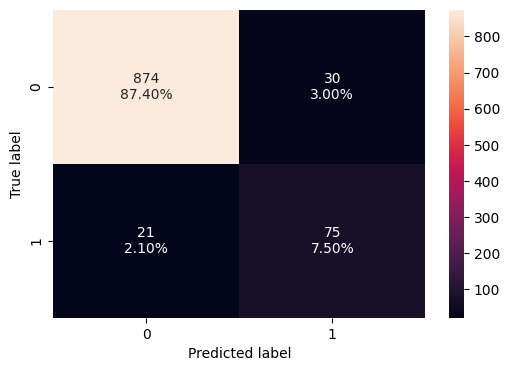

In [119]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [120]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.949,0.78125,0.714286,0.746269


- The training and test scores are very close to each other, indicating a generalized performance.

#### Visualizing the Decision Tree

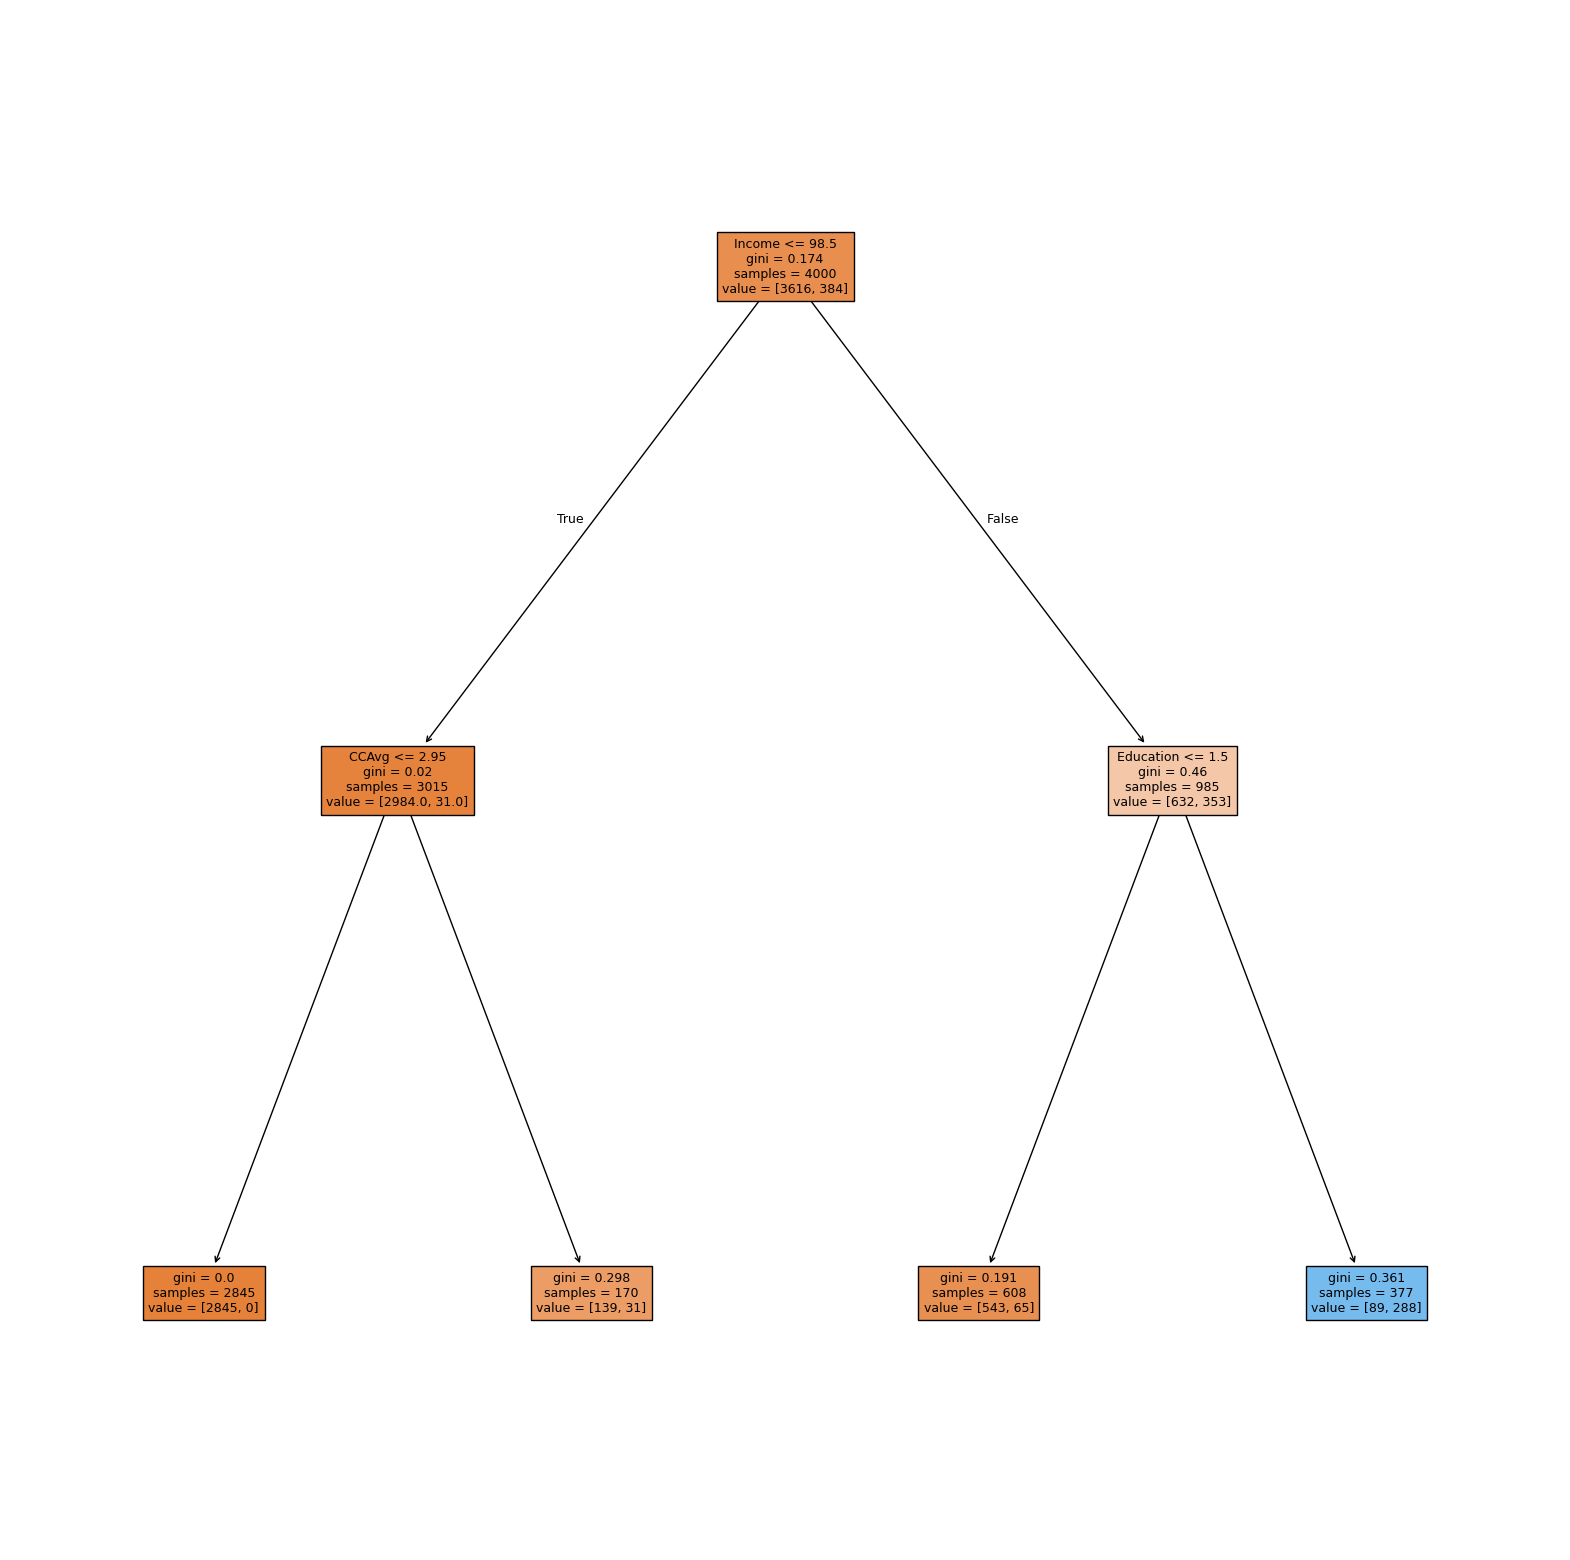

In [121]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [122]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [139.00, 31.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- weights: [543.00, 65.00] class: 0
|   |--- Education >  1.50
|   |   |--- weights: [89.00, 288.00] class: 1



### Decision Tree (Post-pruning)

In [123]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [124]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000235,0.000471
2,0.000244,0.000958
3,0.000246,0.001451
4,0.000306,0.002369
5,0.000331,0.003361
6,0.000333,0.003695
7,0.000333,0.004028
8,0.000373,0.005520
9,0.000375,0.005895


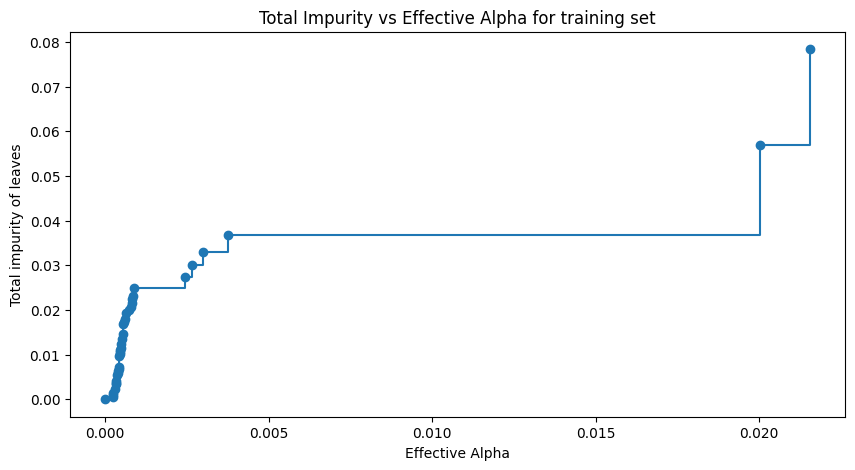

In [125]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

- Next, we train a decision tree using the effective alphas.

- The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [126]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815693


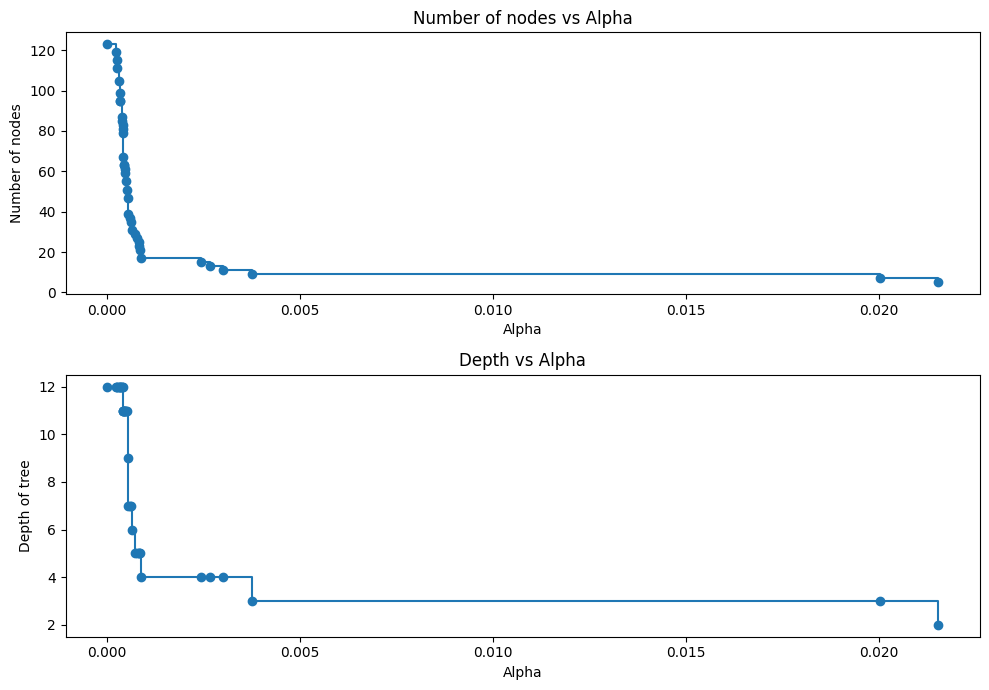

In [127]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [128]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [129]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


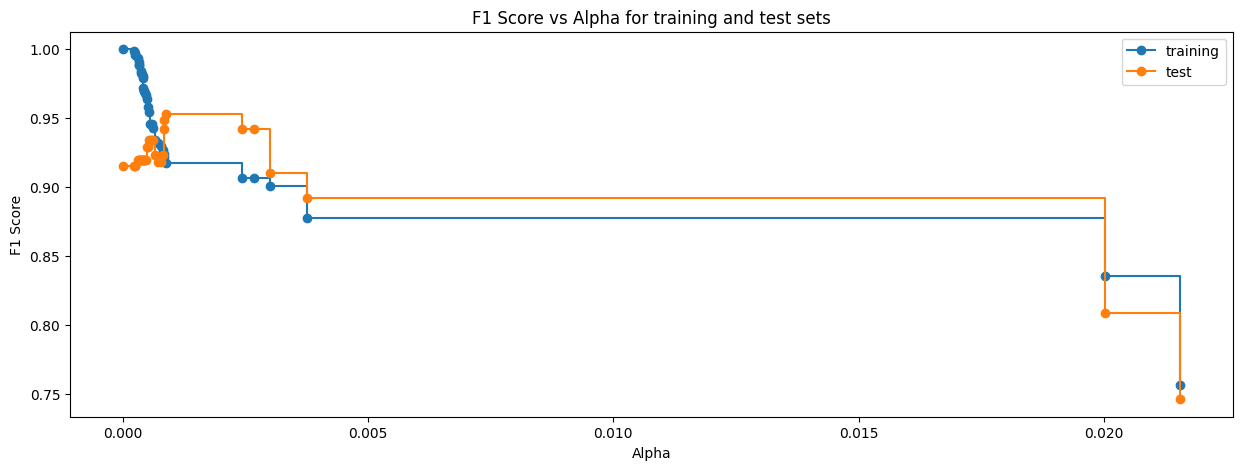

In [130]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [131]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008702884311333967),
                       random_state=42)


#### Model Evaluation

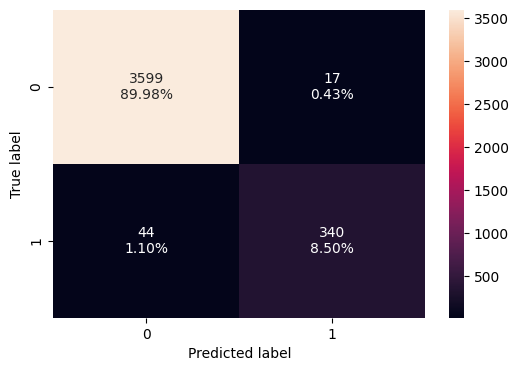

In [132]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [133]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.98475,0.885417,0.952381,0.917679


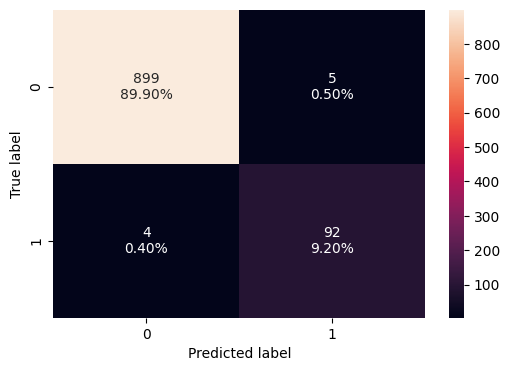

In [134]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [135]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.991,0.958333,0.948454,0.953368


- The test score is greater than the training score, indicating a generalized performance.

#### Visualizing Decision Tree

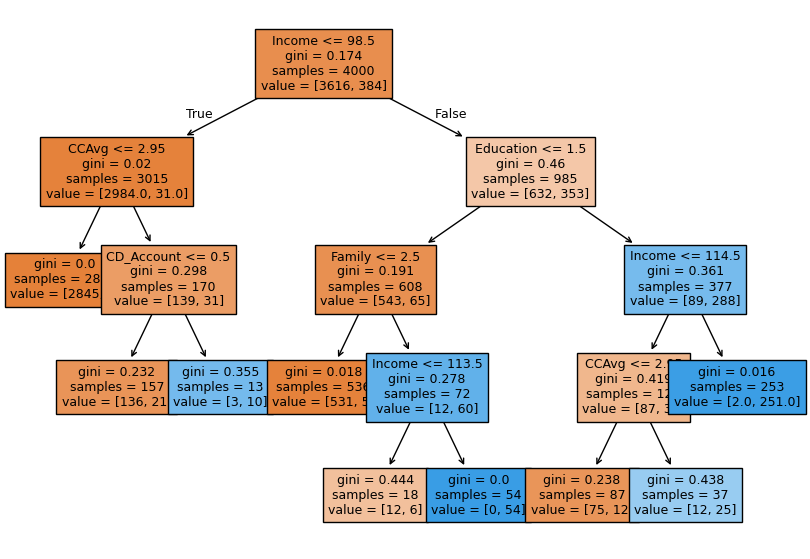

In [136]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [137]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



# **Model Performance Comparison and Final Model Selection**

In [138]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.953750,0.984750
Recall,1.0,0.750000,0.885417
Precision,1.0,0.763926,0.952381
F1,1.0,0.756899,0.917679


In [139]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.975000,0.949000,0.991000
Recall,0.927083,0.781250,0.958333
Precision,0.831776,0.714286,0.948454
F1,0.876847,0.746269,0.953368


* The default and post-pruning decision trees both have high recall (0.958), meaning they successfully identify most potential loan customers.
* The post-pruning tree also has the highest precision and F1-score, indicating a good balance between identifying potential customers and minimizing false positives.

### Feature Importance

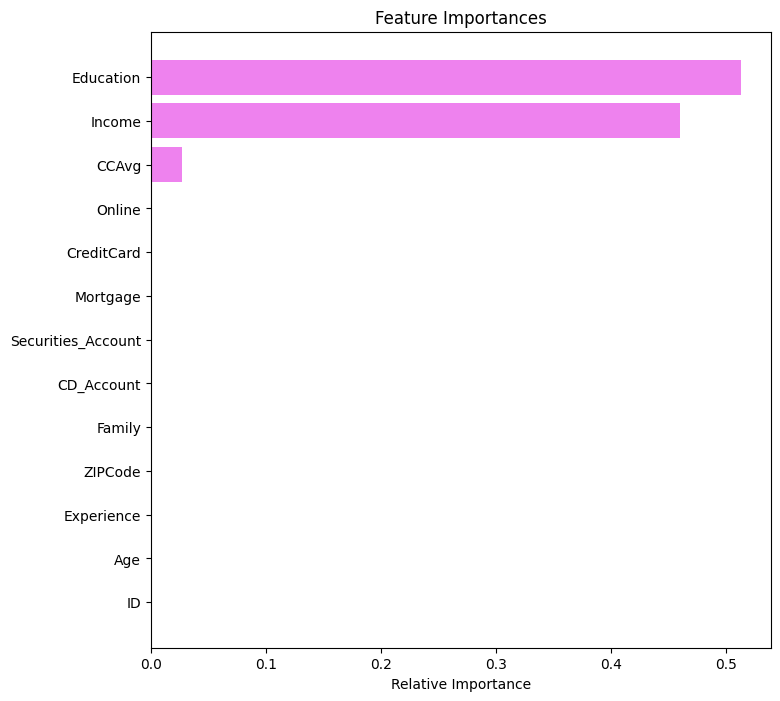

In [140]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Predicting on a single data point

In [141]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = dtree2.predict(applicant_details)

print(approval_prediction)

[0]
CPU times: total: 15.6 ms
Wall time: 15.6 ms


In [142]:
# making a prediction
approval_likelihood = dtree2.predict_proba(applicant_details)

print(approval_likelihood[0, 1])

0.0


In [143]:
# Find the index of a test sample where loan is approved
approved_index = y_test[y_test == 1].index[0]

# Select applicant details for that index
applicant_details = X_test.loc[[approved_index]]

# Predict approval likelihood
approval_likelihood = dtree2.predict_proba(applicant_details)
print(approval_likelihood[0, 1])

0.7639257294429708


# **Business Recommendations**